In [97]:
import numpy as np
import pandas as pd

In [98]:
def generate_rand_signals(time, mu, std, ac, N):
    """
    Funkcija generira naključne podatke za N signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj matriko naključnih vrednosti (N signalov) iz normalne porazdelitve
    data = np.random.normal(mu, std, size=(len(time), N))
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    randomSignal_df = pd.DataFrame(data, columns=[f"signal_{i+1}" for i in range(N)])
    randomSignal_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return randomSignal_df

In [115]:
# Primer uporabe:
time = np.arange(0, 20.02, 0.02)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 1                           # Standardni odklon
ac = 0                            # Korelacija (trenutno ni uporabljena)
N = 30                           # Število signalov

# Generiraj podatke
generiraniSignali = generate_rand_signals(time, mu, std, ac, N)
#print(generiraniSignali)

In [100]:
def plot_signals(df):
    """
    Funkcija za prikaz signalov iz DataFrame-a.

    Args:
        df (pandas.DataFrame): DataFrame, ki vsebuje časovni stolpec ('time') in signale.

    """
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    for column in df.columns[1:]:  # Preskoči 'time' stolpec in nariši signale
        plt.plot(df['time'], df[column], label=column)
    
    plt.title('Generated Signals')
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.legend
    plt.grid(True)
    plt.show()

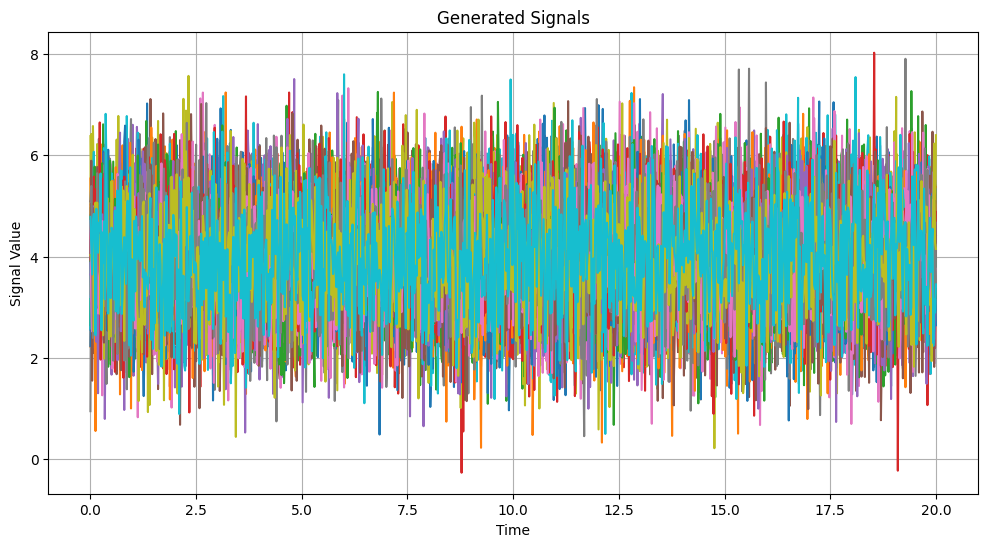

In [116]:
plot_signals(generiraniSignali)

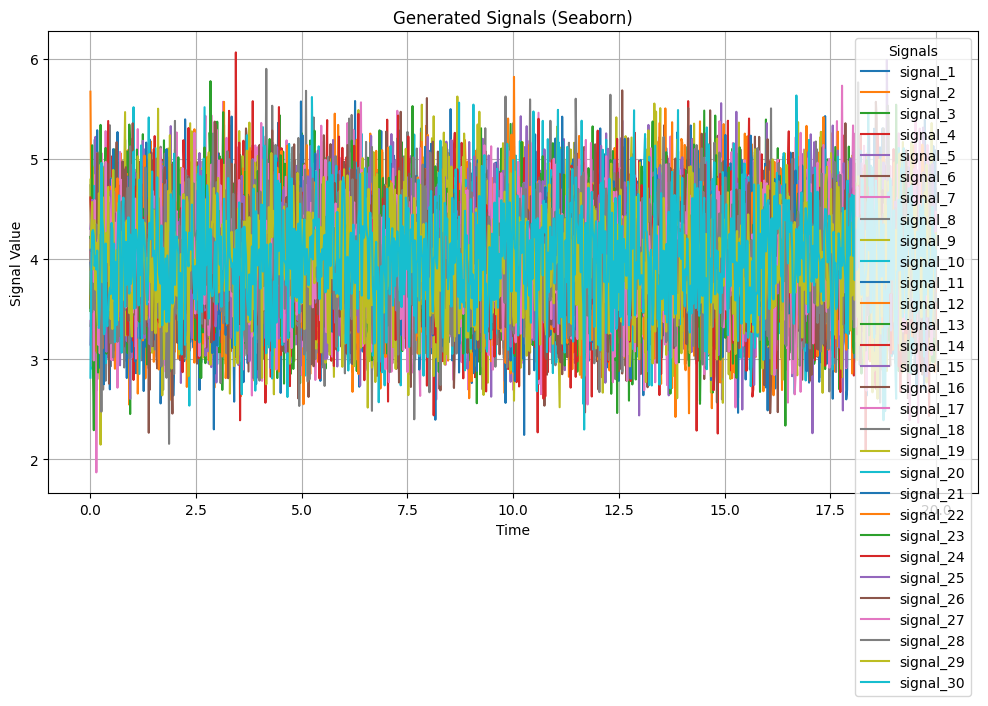

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_signals_seaborn(df):
    """
    Funkcija za prikaz signalov iz DataFrame-a z uporabo Seaborn.

    Args:
        df (pandas.DataFrame): DataFrame, ki vsebuje časovni stolpec ('time') in signale.
    """
    # Preoblikuj DataFrame v dolgo obliko za Seaborn
    df_melted = df.melt(id_vars="time", var_name="Signal", value_name="Value")
    
    # Ustvari graf z uporabo Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x="time", y="Value", hue="Signal", palette="tab10")
    
    # Nastavitve grafa
    plt.title('Generated Signals (Seaborn)')
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.grid(True)
    plt.legend(title='Signals')
    plt.show()

# Klic funkcije za prikaz signalov
plot_signals_seaborn(generiraniSignali)

In [103]:
def anonymize_signals(originalni_signali_df, method_code, method_parameters):
    """
    Funkcija za anonimizacijo signalov.

    Args:
        originalni_signali_df (pandas.DataFrame): DataFrame z originalnimi signali (vključuje stolpec 'time').
        method_code (str): Koda metode za anonimizacijo ('quant' za kvantizacijo).
        method_parameters (dict): Parametri metode {'min': 0, 'max': 10, 'dif': 0.2}.

    Returns:
        anonimizirani_signali_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.
    """
    anonimizirani_signali_df = originalni_signali_df.copy()

    if method_code == 'quant':
        min_val = method_parameters.get('min', 0)
        max_val = method_parameters.get('max', 10)
        dif = method_parameters.get('dif', 0.2)
        #     for column in anonimizirani_signali_df.columns[1:]:
        #         anonimizirani_signali_df[column] = np.round((anonimizirani_signali_df[column] - min_val) / step) * step + min_val
        #         # Omeji vrednosti na [min, max]
        #         anonimizirani_signali_df[column] = np.clip(anonimizirani_signali_df[column], min_val, max_val)

        anonimizirani_signali_df.iloc[:, 1:] = np.round((anonimizirani_signali_df.iloc[:, 1:] - min_val) / dif) * dif + min_val
        # Omeji vrednosti na [min, max]
        anonimizirani_signali_df.iloc[:, 1:] = np.clip(anonimizirani_signali_df.iloc[:, 1:], min_val, max_val)
    
    return anonimizirani_signali_df


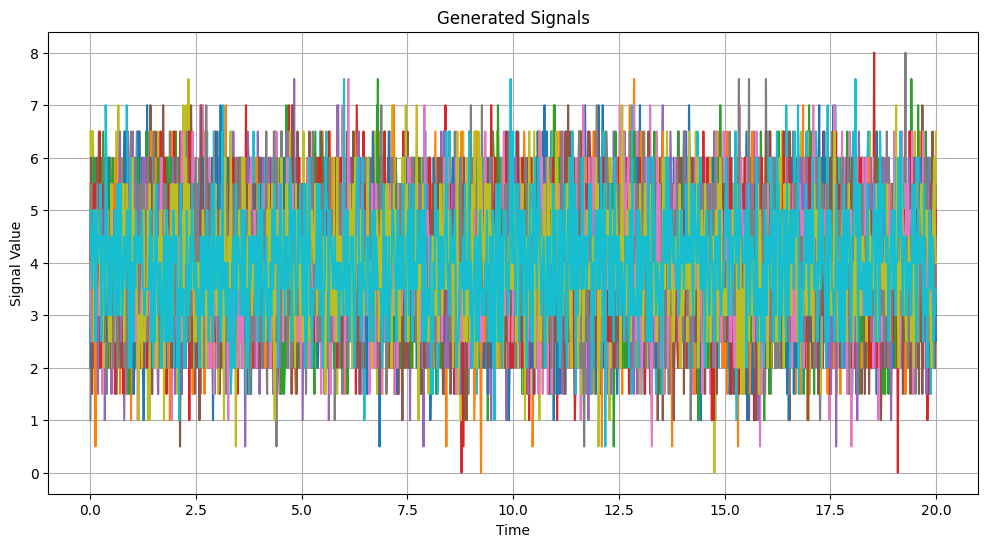

In [117]:
# Anonimizacija podatkov
meth_code = 'quant'
meth_pars = {'min': 0, 'max': 10, 'dif': 0.5}
Y_df = anonymize_signals(generiraniSignali, meth_code, meth_pars)

# Prikaz rezultatov
#print(Y_df)
plot_signals(Y_df)

In [118]:
def anonim_count(X_df, Y_df):
    """
    Funkcija za izračun števila anonimiziranih vrednosti.

    Args:
        X_df (pandas.DataFrame): DataFrame z originalnimi signali.
        Y_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.

    Returns: 
        pandas.DataFrame: Tabela z signal_ID in številom signalov, ki gredo skozi enake razrede anonimizaicije.
    """
    results = []
    for column in Y_df.columns[1:]:
        count = 0
        for column2 in Y_df.columns[1:]:
            if (Y_df[column] == Y_df[column2]).all():
                count += 1 
        results.append({'signal_ID': column, 'count': count})
    
    result_df = pd.DataFrame(results)
    return result_df


In [119]:
# Primer uporabe funkcije
anonim_count_results = anonim_count(generiraniSignali, Y_df)
print(anonim_count_results)

    signal_ID  count
0    signal_1      1
1    signal_2      1
2    signal_3      1
3    signal_4      1
4    signal_5      1
5    signal_6      1
6    signal_7      1
7    signal_8      1
8    signal_9      1
9   signal_10      1
10  signal_11      1
11  signal_12      1
12  signal_13      1
13  signal_14      1
14  signal_15      1
15  signal_16      1
16  signal_17      1
17  signal_18      1
18  signal_19      1
19  signal_20      1
20  signal_21      1
21  signal_22      1
22  signal_23      1
23  signal_24      1
24  signal_25      1
25  signal_26      1
26  signal_27      1
27  signal_28      1
28  signal_29      1
29  signal_30      1


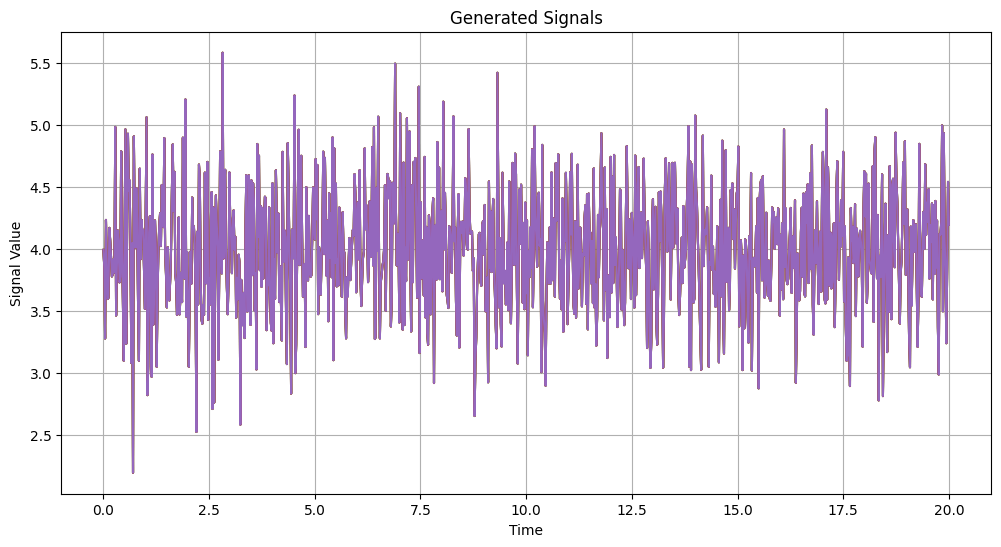

,signal_ID,count
0,signal_1,5
1,signal_2,5
2,signal_3,5
3,signal_4,5
4,signal_5,5


In [120]:
# Generiranje enakih signalov, za testiranje
def generate_same_signals(time, mu, std, ac, N):
    """
    Funkcija generira N enakih naključnih signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj en naključni signal iz normalne porazdelitve
    single_signal = np.random.normal(mu, std, size=len(time))
    
    # Ustvari matriko z N kopijami tega signala
    data = np.tile(single_signal, (N, 1)).T
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    sameSignals_df = pd.DataFrame(data, columns=[f"signal_{i+1}" for i in range(N)])
    sameSignals_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return sameSignals_df

time = np.arange(0, 20.02, 0.02)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 0.5                           # Standardni odklon
ac = 0                            # Korelacija (trenutno ni uporabljena)
N = 5                           # Število signalov

same_signals_df = generate_same_signals(time, mu, std, ac, N)
plot_signals(same_signals_df)
anonizirani = anonymize_signals(same_signals_df, meth_code, meth_pars)
anonim_count(same_signals_df, same_signals_df)
